<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


Above is the template for the tutorial containing some functions that will be used

In [2]:
# Here I'm importing all the other libaries which have been used in previous tutorials in case they come up again
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed so our results don't change each time the code is rerun
np.random.seed(0)

Question 1

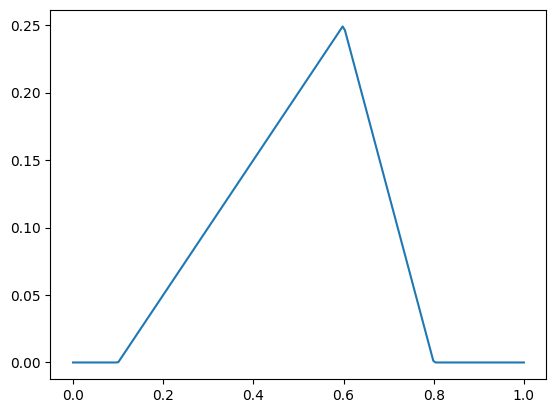

In [ ]:
# Fitting a funtion using Keras
# Defining an x array
x = np.linspace(0, 1, 200)

# Setting up a function of x
y = x.copy()
y[x < 0.1] = 0
y[x >= 0.1] = 0.5 * (x[x >= 0.1] - 0.1)
y[x >= 0.6] = 0.25 - 0.25/0.2 * ((x[x >= 0.6] - 0.6))
y[x > 0.8] = 0

fig, ax = plt.subplots()
plt.plot(x, y)

Above we have plotted an example of combinations of ReLUs, we will now use Keras to fit the function

In [ ]:
# Set up a sequential neural network
model = Sequential()

# Add a layer of 3 nodes of ReLUs, taking a single parametric input
model.add(Dense(units = 10, activation = 'relu', input_dim = 1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
# Add a linear node at the end to combine the nodes together
model.add(Dense(units = 1, activation = 'linear'))

# Compile the model, trying to minimise the mean squared error and using the Adam algorithm to fit this
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit the data provided, using 200 epochs and a batch size of 32.
model.fit(x, y, epochs = 200, batch_size = 32)

# Obtain a predicted set of values from the fitted function along its length
y_pred = model.predict(x)

# Plotting the predicted values and the true values
fig2, ax2 = plt.subplots()
plt.plot(x, y, label = 'True values')
plt.plot(x, y_pred, label = 'Predicted values')

# Can manually set weights to be correct
#model.layers[0].set_weights([np.array([[0.5,-(-0.5-0.25/0.2),0.25/0.2]],),
#np.array([-0.5*0.1,(-0.5-0.25/0.2)*0.6,-(0.25/0.2)*0.8],)])
#model.layers[1].set_weights([np.array([[1],[-1],[1]],),np.array([0],)])
#y_predCorrect = model.predict(x)
#plt.plot(x, y_predCorrect, label = 'Correct predicted values')
plt.legend()

Above we have created a neural network using keras to predict a ReLU based function, the tutorial saw us vary the number of epochs run through, layers and the function it was based on to see how that changed the prediction

Question 2

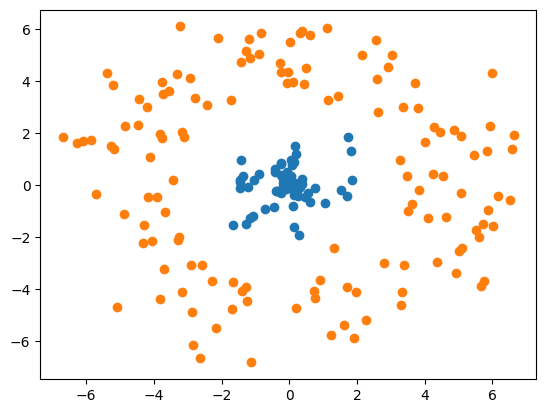

In [3]:
# Generating a simple circular dataset
X, y = gen_simple_circular_distribution(200)
# Plotting
fig3, ax3 = plt.subplots()
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Above we have generated a simple circular dataset and plotted it

Epoch 1/250
7/7 [==============================] - 1s 78ms/step - loss: 0.4731
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4574
Epoch 3/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4438
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4330
Epoch 5/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4245
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4171
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4104
Epoch 8/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4045
Epoch 9/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3984
Epoch 10/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3929
Epoch 11/250
7/7 [==============================] - 0s 4ms/step - loss: 0.3879
Epoch 12/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3829
Epoch 13/250
7/7 [==============================] - 0s 3ms/s

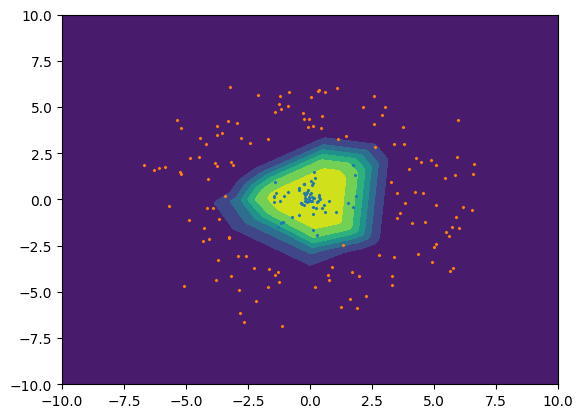

In [15]:
# Initialising our neural network
model = Sequential()

# Adding layers, these layers are two layers of 4 nodes using the ReLU function and 1 with 2 nodes using the softmax function
model.add(Dense(units = 4, activation = 'relu', input_dim = 2))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd')

# Converting our currently 1D y values to 2D to match our model
y_binary = to_categorical(y)

# Fitting the model
model.fit(X, y_binary, epochs = 250, batch_size = 32)

# Creating a grid from -10 to 10
x1 = np.linspace(-10, 10, 201)
x2 = np.linspace(-10, 10, 201)
x1grid, x2grid = np.meshgrid(x1, x2)
Xmesh = np.array([x1grid, x2grid]).reshape([2, 201*201]).T

# Predicting values
y_pred = model.predict(Xmesh)
# Reshaping this to be able to contour, we are only using one column of y_pred as they are probabilities meaning each row sums to 1, therefore each column contains all the information
y_pred_reshape = np.reshape(y_pred[:, 0], [201, 201])

# Plotting everything
fig4, ax4 = plt.subplots()
plt.contourf(x1, x2,y_pred_reshape)
plt.scatter(X[y==0, 0], X[y==0, 1], marker = 'x', s = 2)
plt.scatter(X[y==1, 0], X[y==1, 1], marker = 'x', s = 2)


Above is the final code for what the question asks for, then wants us to play around with the options so I will copy and past it into a new code box and play with it there

In [ ]:
# Generating a simple circular dataset
X, y = gen_simple_circular_distribution(200)
# Plotting
fig3, ax3 = plt.subplots()
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# Initialising our neural network
model = Sequential()

# Adding layers, these layers are two layers of 4 nodes using the ReLU function and 1 with 2 nodes using the softmax function
model.add(Dense(units = 4, activation = 'relu', input_dim = 2))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd')

# Converting our currently 1D y values to 2D to match our model
y_binary = to_categorical(y)

# Fitting the model
model.fit(X, y_binary, epochs = 250, batch_size = 32)

# Creating a grid from -10 to 10
x1 = np.linspace(-10, 10, 201)
x2 = np.linspace(-10, 10, 201)
x1grid, x2grid = np.meshgrid(x1, x2)
Xmesh = np.array([x1grid, x2grid]).reshape([2, 201*201]).T

# Predicting values
y_pred = model.predict(Xmesh)
# Reshaping this to be able to contour, we are only using one column of y_pred as they are probabilities meaning each row sums to 1, therefore each column contains all the information
y_pred_reshape = np.reshape(y_pred[:, 0], [201, 201])

# Plotting everything
fig4, ax4 = plt.subplots()
plt.contourf(x1, x2,y_pred_reshape)
plt.scatter(X[y==0, 0], X[y==0, 1], marker = 'x', s = 2)
plt.scatter(X[y==1, 0], X[y==1, 1], marker = 'x', s = 2)
